# Discussion 4

### Due Saturday April 23rd, 11:59:59PM


## Agenda: Plotting (Pandas, Seaborn, Matplotlib) and EDA

* **Pandas (plotting):** `.plot` dataFrame/Series methods conveniently plot tabular data (calls Matplotlib).
* **Seaborn:** A python plotting library similar to R's ggplot; makes common statistical plots easy.
* **Matplotlib:** Low-level plotting library built on Numpy; use it directly when you want to customize!


* **EDA:** Guide to exploring unknown data through visualizations - Univariate and Bivariate analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/nix-shell.GO31Ct/matplotlib-91oi_g0y because the default path (/home/murali/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# from discussion import *

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

## 1. Plotting in `pandas` is as easy as `.plot()`

* `Series.plot()` plots a column.

In [4]:
data = pd.read_csv('data/data.csv')

In [5]:
data.head()

,id,x,z0,z1,z2,z3
0,3,0.0000,0.000000,0.000000,-0.000000,0.273816
1,3,0.1001,-0.102628,0.001595,0.052832,-0.487302
2,3,0.2002,-0.223206,0.006378,-0.198124,-0.844929
3,2,0.3003,-0.484955,0.014347,0.126451,-0.357906
4,2,0.4004,0.350514,0.025499,0.439444,0.602113


In [6]:
# select a column from data
z0 = data['z0']
z0.head()

0    0.000000
1   -0.102628
2   -0.223206
3   -0.484955
4    0.350514
Name: z0, dtype: float64

* Use a line plot to plot numeric data.
* `data.plot()` plots a line plot by default.
    - The x-axis is the index by default
    - Can be called out using the key-word argument `x`.

<AxesSubplot:>

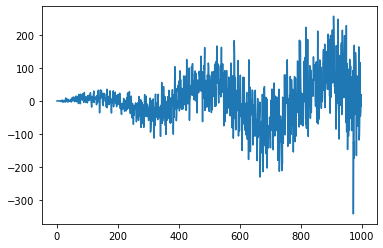

In [7]:
# index is [0...1000]
z0.plot()

In [8]:
# set index to plot correct x-axis
z0 = data.set_index('x').loc[:, 'z0']
z0.head()

x
0.0000    0.000000
0.1001   -0.102628
0.2002   -0.223206
0.3003   -0.484955
0.4004    0.350514
Name: z0, dtype: float64

<AxesSubplot:xlabel='x'>

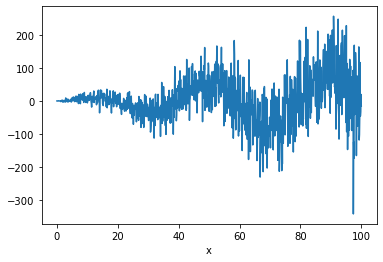

In [9]:
z0.plot()

<AxesSubplot:xlabel='x'>

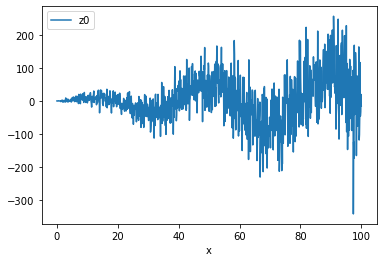

In [10]:
# set x-axis using a keyword argument
data.plot(x='x', y='z0')

### Plotting (quantitative) empirical distributions in Pandas

* Use the key-word argument `kind`
```
kind : str
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    ...
```
* The `hist` keyword by default uses 10 bins, and returns the *count* of observations within those bins.
    - use `density=True` to return a histogram whose area is normalized to 1.

<AxesSubplot:ylabel='Frequency'>

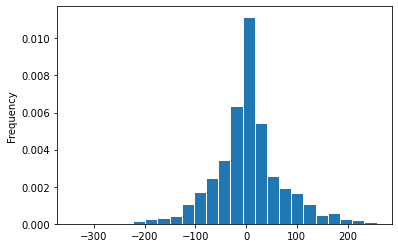

In [11]:
# histogram of z0 values; 
# 25 bins.
# density = normalized histogram

z0.plot(kind='hist', bins=25, density=True, ec='w')

<AxesSubplot:ylabel='Density'>

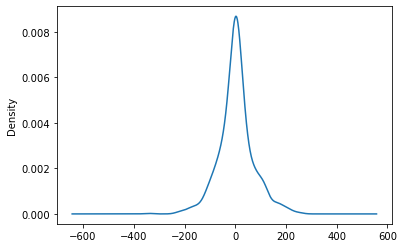

In [12]:
# kernel density estimate of the distribution
# smooth approximation of the empirical distribution

z0.plot(kind='kde')

<AxesSubplot:>

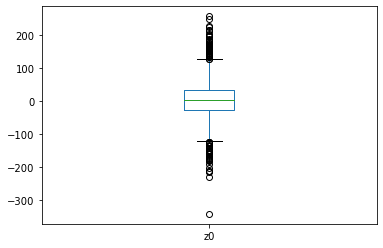

In [13]:
z0.plot(kind='box')

### Plotting (categorical) empirical distributions in Pandas

* Create a distribution from categorical columns using `value_counts`.
* Categorical columns should use *bar charts*.
* Use the key-word argument `kind`
```
kind : str
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    ...
```


In [14]:
empdistr = data['id'].value_counts(normalize=True)
empdistr

3    0.272
0    0.257
1    0.243
2    0.228
Name: id, dtype: float64

<AxesSubplot:>

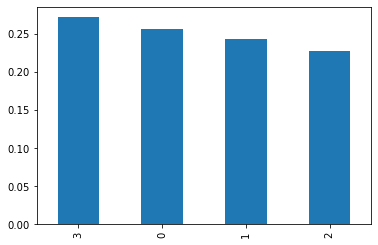

In [15]:
# nominal column
empdistr.plot(kind='bar')

<AxesSubplot:>

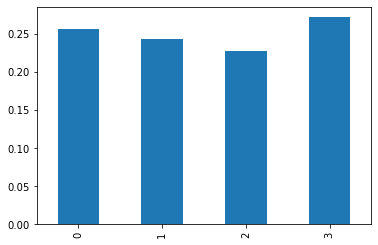

In [16]:
# ordinal column: the x-axis has a meaningful order
empdistr.sort_index().plot(kind='bar')

<AxesSubplot:>

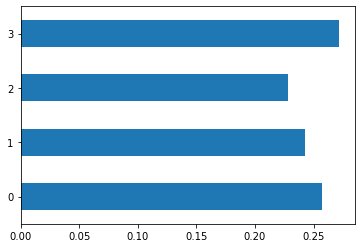

In [17]:
# horizontal bar chart
empdistr.sort_index().plot(kind='barh')

### Plotting `pandas` DataFrames
* `DataFrame.plot()` plots the columns of a dataframe.
* Want multiple plot on the same axis? Get the data into the columns of a dataframe!

In [18]:
data.set_index('x').head()

,id,z0,z1,z2,z3
x,,,,,
0.0000,3,0.000000,0.000000,-0.000000,0.273816
0.1001,3,-0.102628,0.001595,0.052832,-0.487302
0.2002,3,-0.223206,0.006378,-0.198124,-0.844929
0.3003,2,-0.484955,0.014347,0.126451,-0.357906
0.4004,2,0.350514,0.025499,0.439444,0.602113


<AxesSubplot:xlabel='x'>

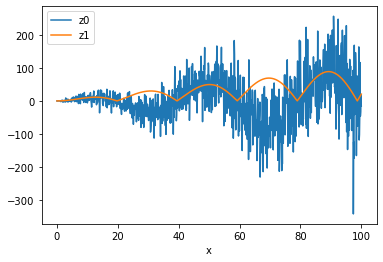

In [19]:
# plot columns 'z0' and 'z1' with 'x' used as the x-axis
data.set_index('x')[['z0', 'z1']].plot()

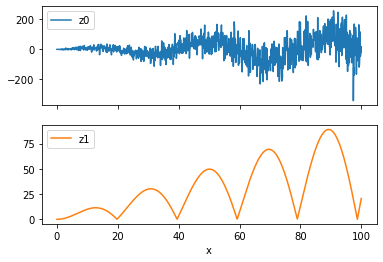

In [20]:
# plot columns 'z0' and 'z1' with 'x' used as the x-axis on seperate plots
data.set_index('x')[['z0', 'z1']].plot(subplots=True);

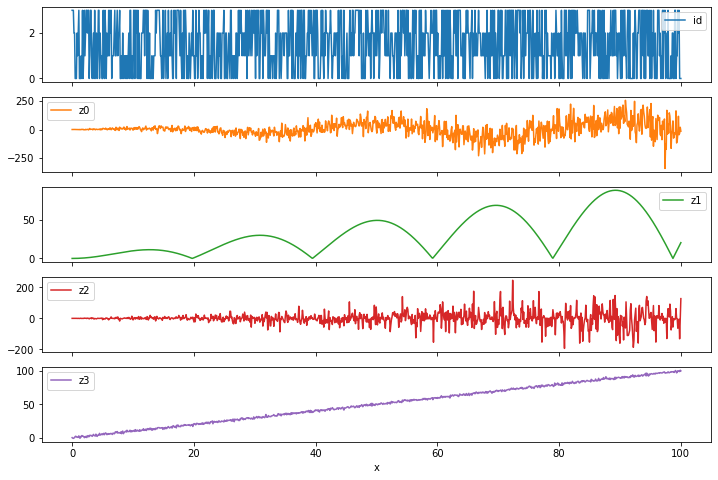

In [21]:
# plot all columns using 'x' as x-axis; elongate plots with 'figsize' keyword
data.set_index('x').plot(subplots=True, figsize=(12,8));

### Scatter-plots with Pandas
* You can create scatter plots with `DataFrame.plot` by passing `kind='scatter'`. Scatter plot requires numeric columns for `x` and `y` axis. 
    * These can be specified by `x` and `y` keywords each.
* To plot multiple column groups in a single axes, repeat plot method specifying target `ax`. It is recommended to specify color and label keywords to distinguish each groups.

<AxesSubplot:xlabel='z0', ylabel='z1'>

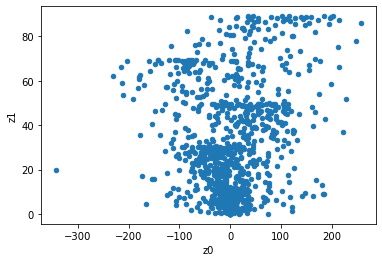

In [22]:
data.plot(kind='scatter', x='z0', y='z1')

/nix/store/k3120fhhrkn7gn9bvxsjzmcn8sr0sw1w-python3.8-pandas-1.2.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


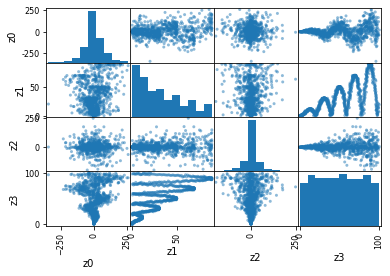

In [23]:
# plot all the histograms and scatterplots in one plot!
# univariate + bivariate analysis
pd.plotting.scatter_matrix(data.drop(['id', 'x'], axis=1));

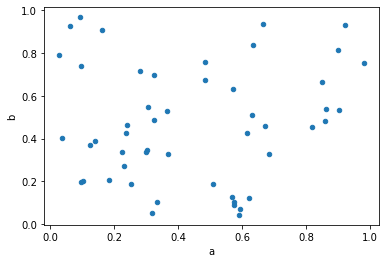

In [24]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind='scatter', x='a', y='b');

There are other keywords that can be used with scatter. The keyword `c` may be given as the name of a column to provide colors for each point:

In [25]:
samp = data.sample(100)

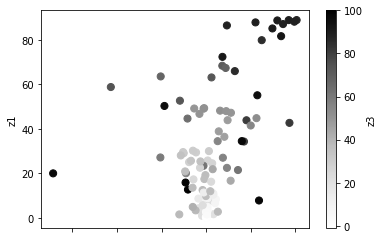

In [26]:
samp.plot(kind='scatter', x='z0', y='z1', c='z3', s=50);

You can pass other keywords supported by matplotlib `scatter`. The example below shows a bubble chart using a dataframe `column` values as bubble size.

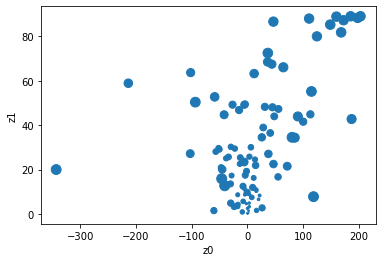

In [27]:
samp.plot(kind='scatter', x='z0', y='z1', s=samp['x']);

## 2. Seaborn: pretty plotting made easy

To install `seaborn`, open a terminal and enter: 

On your laptop:
* `pip install seaborn==0.9`

or, if you are on a shared server (e.g. on `datahub.ucsd.edu`):

* `pip install --user seaborn==0.9`

The `seaborn` documentation has a *great* series of tutorials: https://seaborn.pydata.org/tutorial.html


In [28]:
import seaborn as sns
sns.__version__

'0.11.1'

#### `sns.scatterplot`
* The relationship between `x` and `y` can be shown for different subsets of the data using the `hue`, `size`, and `style` parameters. 
* These parameters control what visual semantics are used to identify the different subsets. 
* It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. 
    * Using redundant semantics (i.e. both `hue` and `style` for the same variable) can be helpful for making graphics more accessible.

Show a quantitative variable by using continuous colors:

<AxesSubplot:xlabel='z0', ylabel='z1'>

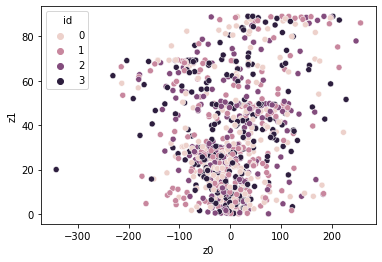

In [29]:
sns.scatterplot(data=data, x='z0', y='z1', hue='id')

Also show a quantitative variable by varying the size of the points:

<AxesSubplot:xlabel='z0', ylabel='z1'>

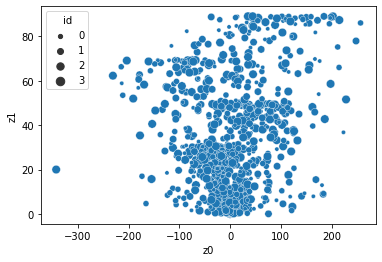

In [30]:
sns.scatterplot(data=data, x='z0', y='z1', size='id')

#### `sns.lmplot`

Plot a simple linear relationship between two variables:

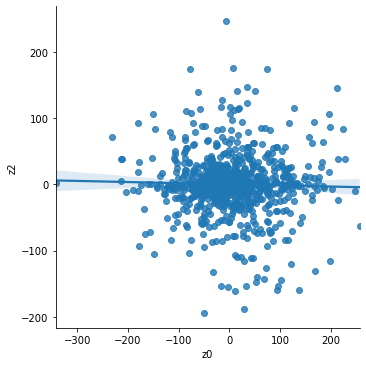

In [31]:
# plot a line of best fit
sns.lmplot(data=data, x='z0', y='z2');

#### `sns.distplot`

Plot the distribution with a histogram, kernel density estimate, and rug plot:

/nix/store/7yxhl3r5cfcvaps6l88801jdgrzrnyxy-python3-3.8.9-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/nix/store/7yxhl3r5cfcvaps6l88801jdgrzrnyxy-python3-3.8.9-env/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z3', ylabel='Density'>

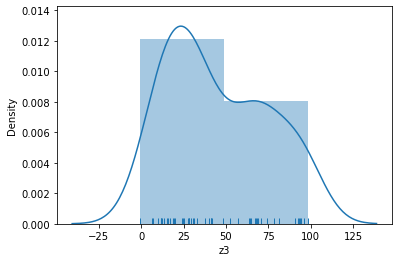

In [32]:
z3 = data.sample(50)['z3']
sns.distplot(z3, hist=True, kde=True, rug=True)

#### `sns.boxplot`

Draw a vertical boxplot grouped by a categorical variable:

<AxesSubplot:xlabel='id', ylabel='z2'>

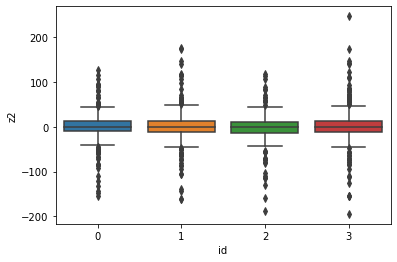

In [33]:
sns.boxplot(data=data, x='id', y='z2')

## 3. Custom plots with `matplotlib`

* There are other great resources for learning the matplotlib API, for example, [this tutorial](https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html)
* A lot of examples and tutorials are also given in the [official website](https://matplotlib.org/stable/gallery/index.html)

In [34]:
import matplotlib.pyplot as plt

### Matplotlib `axes` objects and Pandas plots

* An 'Axes' object contains the elements of a single plot.
    - contains a coordinate system (axis elements), 
    - the plot elements (e.g. line, bar), 
    - labels, 
    - tick-marks, etc.
    
* A `DataFrame.plot()` method call returns an `axes` object

#### Anatomy of a Matplotlib Figure
[Source](https://matplotlib.org/3.5.0/gallery/showcase/anatomy.html)

Understanding the terminology and anatomy is really helpful in efficient searching and customization of matplotlib plots.

<img src="imgs/anatomy_fig_matplotlib.png" width="60%"/>

<AxesSubplot:xlabel='x'>

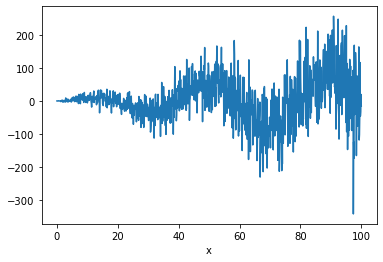

In [35]:
# notice the <matplotlib.axes._subplots.AxesSubplot at 0x1a21f7bcf8>
data.set_index('x')['z0'].plot()

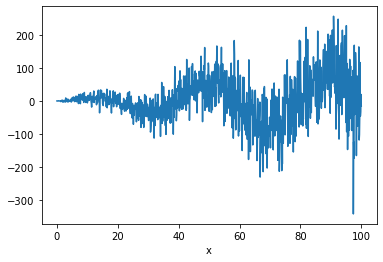

In [36]:
# save the plot as an variable
ax = data.set_index('x')['z0'].plot()

In [37]:
# get name of x-axis
ax.get_xlabel()

'x'

In [38]:
# get y-axis tick-labels
list(ax.get_yaxis().get_majorticklabels())

[Text(0, -400.0, '−400'),
 Text(0, -300.0, '−300'),
 Text(0, -200.0, '−200'),
 Text(0, -100.0, '−100'),
 Text(0, 0.0, '0'),
 Text(0, 100.0, '100'),
 Text(0, 200.0, '200'),
 Text(0, 300.0, '300')]

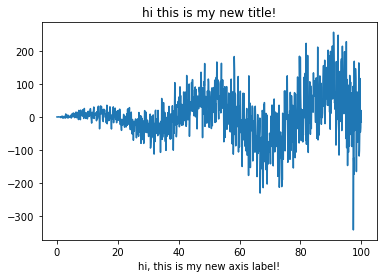

In [39]:
ax = data.set_index('x')['z0'].plot()
ax.set_xlabel('hi, this is my new axis label!')
ax.set_title('hi this is my new title!');

#### You can add elements to an Axes object

* The Pandas `.plot` method can add a plot to an existing Axes object using the `ax` keyword

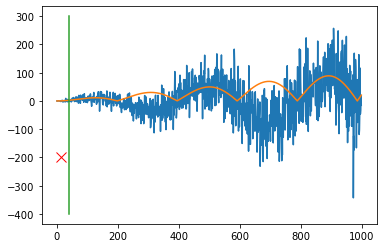

In [40]:
ax = data['z0'].plot()

# add z1 to Axes
data['z1'].plot(ax=ax)

# add a vertical line using matplotlib
plt.plot([40,40],[-400, 300])

# add a point using matplotlib
plt.plot(15,-200, marker='x', markersize=10, color='red')

#### You can add a scatterplot to an existing scatterplot

<AxesSubplot:xlabel='z0', ylabel='z3'>

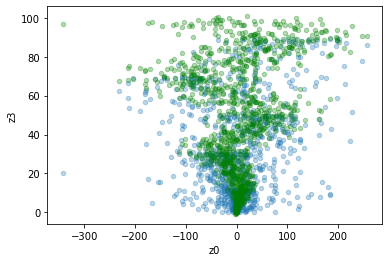

In [41]:
ax = data.plot(kind='scatter', x='z0', y='z1', alpha=0.3)

# the 'ax' keyword in Pandas plot method attaches the new plot to an existing Axes object
data.plot(kind='scatter', x='z0', y='z3', ax=ax, c='g', alpha=0.3)

### Matplotlib `figure` and adding to empty subplots

* A 'Figure' object is a top-level container for all plotting objects.
    - controls overall size, title, fonts, coordination between different elements of subplots.

<img src="https://i.stack.imgur.com/HZWkV.png" width="25%">  

* Instantiate an empty figure containing multiple plots with `plt.subplots`
    - `fig, axes = plt.subplots(R, C)` returns a figure `fig` and an multi-array of `axes`.
    - `axes` has `R` rows and `C` columns corresponding to the subplots laid out on a grid.
    - The `axes` are initially empty; they need to be given data to plot.
   

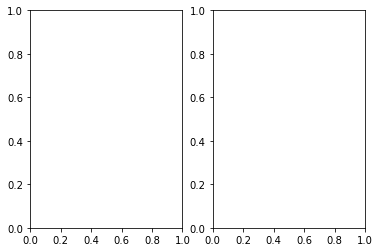

In [42]:
fig, axes = plt.subplots(1, 2)

In [43]:
len(axes), type(axes), type(axes[0])

(2, numpy.ndarray, matplotlib.axes._subplots.AxesSubplot)

/nix/store/k3120fhhrkn7gn9bvxsjzmcn8sr0sw1w-python3.8-pandas-1.2.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nix/store/k3120fhhrkn7gn9bvxsjzmcn8sr0sw1w-python3.8-pandas-1.2.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'z1'}, xlabel='x'>

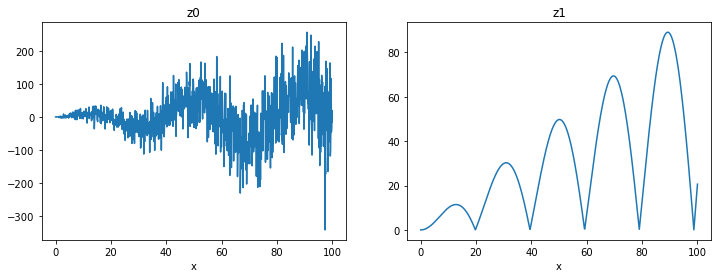

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

df = data.set_index('x')
df['z0'].plot(ax=axes[0], title='z0')
df['z1'].plot(ax=axes[1], title='z1')

<AxesSubplot:title={'center':'z1'}, xlabel='x'>

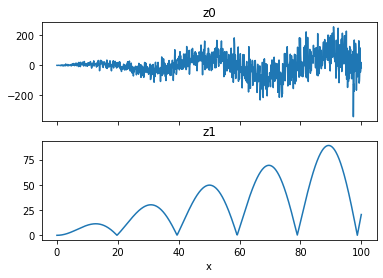

In [45]:
fig, axes = plt.subplots(2, 1, sharex=True)

df = data.set_index('x')
df['z0'].plot(ax=axes[0], title='z0')
df['z1'].plot(ax=axes[1], title='z1')

### Practice: plots and groupby

* Can we plot histograms of `z2` for each value of `id`?

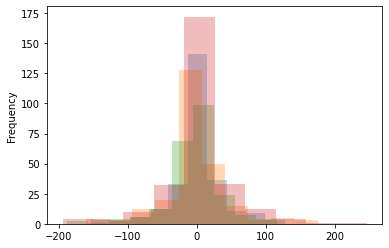

In [46]:
# Hard to understand!
data.drop('x', axis=1).groupby('id')['z2'].plot(kind='hist', alpha=0.3);

In [47]:
data['id'].nunique()

4

In [48]:
grps = data.groupby('id')
for k, gp in grps:
    print('**** ' + str(k) + ' ****', grps.get_group(k).head().to_string(), sep='\n', end='\n\n')

**** 0 ****
    id         x        z0        z1        z2        z3
5    0  0.500501  0.656201  0.039826 -0.002671  1.936168
6    0  0.600601  0.062109  0.057323 -0.300463  2.413680
7    0  0.700701 -0.104768  0.077980  0.025956  1.188075
12   0  1.201201  0.305381  0.228246 -0.671664  0.178395
13   0  1.301301 -2.206168  0.267588 -0.388144 -0.660209

**** 1 ****
    id         x        z0        z1        z2        z3
9    1  0.900901 -0.138246  0.128732 -0.294140  0.643807
15   1  1.501502  1.580229  0.355410 -0.357457  1.382945
19   1  1.901902 -3.038251  0.566949 -0.242903  2.138369
21   1  2.102102 -2.763949  0.690233  0.115374  1.088930
29   1  2.902903  9.130869  1.293967  0.566253  3.877149

**** 2 ****
    id         x        z0        z1        z2        z3
3    2  0.300300 -0.484955  0.014347  0.126451 -0.357906
4    2  0.400400  0.350514  0.025499  0.439444  0.602113
8    2  0.800801 -0.422969  0.101787 -0.369003  1.408457
10   2  1.001001 -0.181149  0.158800  0.031764  0.

/nix/store/k3120fhhrkn7gn9bvxsjzmcn8sr0sw1w-python3.8-pandas-1.2.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


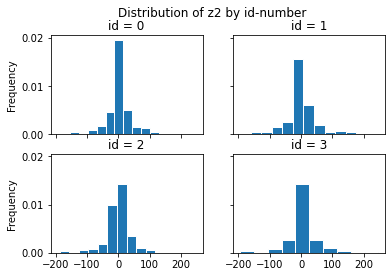

In [49]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for k, gp in data.groupby('id'):
    x_idx = k // 2
    y_idx = k % 2
    ax = axes[x_idx, y_idx]
    title = 'id = %d' % k
    gp['z2'].plot(kind='hist', density=True, ax=ax, title=title, ec='w')
    
fig.suptitle('Distribution of z2 by id-number');


**Try out (Optional)**: Can you plot the histograms of each column by `id`? Each row should contain the histograms by `id` of a single variable (there should be 3 rows and 4 columns). Write this generally enough to handle an arbitrary number of variables and values of `id`.

### Exploring Unknown Data through Visualizations

- Univariate Analysis
    - Numerical/Continuous variables - Histogram, density plot, box plot etc.
    - Categorical variables - Bar plot of counts


- Bivariate Analysis
    - Continuous vs. Continuous - What kind of plot is best?
    - Continuous vs. Categorical - What kind of plot is best?
    - Categorical vs. Categorical - What kind of plot is best?
    
Try to use this as a starting point in your EDA on an unknown dataset. These univariate and bivariate analysis should generate more hypothesis and questions to dig further.

Practice this on the below `tips` dataset.

### Practice problems

* Below is a dataset in the seaborn package that contains data on restaurant bills and (service) tips.
* Try to understand the dataset via plotting using the examples in the notebook.
    - Plot histograms and boxplots for quantitative columns
    - Plot counts of categorical values using bar plots
    - Plot a scatter plot of `tip` vs `total_bill` -- is the relationship linear?

In [50]:
tips = sns.load_dataset('tips')

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
# ======== Univariate ===========

# sns.histplot(data=tips, x= 'total_bill', ec='w')
# sns.boxplot(data=tips, x= 'total_bill')

# sns.countplot(data=tips, x = 'sex')

# ======== Bivariate ============

# sns.scatterplot(data=tips, x='total_bill', y='tip')

# sns.boxplot(data=tips, x= 'sex', y='total_bill')

# cross_tab_prop = pd.crosstab(index=tips['sex'], columns=tips['smoker'], normalize="index")
# cross_tab_prop
# cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.legend(loc="upper left", ncol=2)
# plt.xlabel("Sex")
# plt.ylabel("Proportion")
# plt.show()

**Question 1**

Plot the counts of meals in `tips` by day. Your plotting function, `plot_meal_by_day` should return an `matplotlib.axes._subplots.AxesSubplot` object; your plot should look like the plot below. 

Note: You don't need to have exact same colors, but the plot orientation, axis order, and title should match.

<img src="imgs/barh.png" width="50%"/>

In [53]:
def plot_meal_by_day(tips):
    """
    Plots the counts of meals in tips by day.
    plot_meal_by_day returns a Figure
    object; your plot should look like the plot in the notebook.

    :Example:
    >>> tips = sns.load_dataset('tips')
    >>> fig = plot_meal_by_day(tips)
    >>> type(fig)
    <class 'matplotlib.figure.Figure'>
    """
    fig = plt.figure()
    # BEGIN SOLUTION
    ax = (
        tips['day']
        .value_counts()
        .sort_index()
        .plot(kind='barh', title='Counts of meals by day')
    )
    # END SOLUTION
    return fig


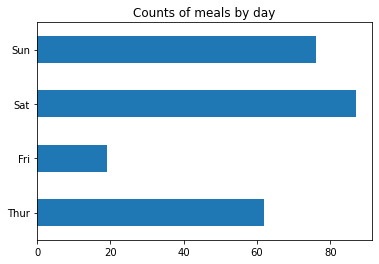

In [54]:
# don't change this cell -- it is needed for the tests to work
tips = sns.load_dataset('tips')
q1_fig = plot_meal_by_day(tips)

In [55]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest'
""" # END TEST CONFIG
isinstance(q1_fig, matplotlib.figure.Figure)

True

In [56]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'need correct title'
""" # END TEST CONFIG
q1_fig.get_axes()[0].get_title()

'Counts of meals by day'

In [57]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'y-axis sorted and labeled correctly?'
""" # END TEST CONFIG
[str(x.get_text()) for x in q1_fig.get_axes()[0].get_yticklabels()]

['Thur', 'Fri', 'Sat', 'Sun']

**Question 2**

Plot a seaborn scatterplot using the `tips` data by day. Your plotting function, `plot_bill_by_tip` should return a `matplotlib.axes._subplots.AxesSubplot` object; your plot should look like the plot below.
* `tip` is on the x-axis.
* `total_bill` is on the y-axis.
* color of the dots are given by `day`.
* size of the dots are given by `size` of the table.

<img src="imgs/scatter.png" width="50%"/>

In [58]:
def plot_bill_by_tip(tips):
    """
    Plots a seaborn scatterplot using the tips data by day.
    plot_bill_by_tip returns a Figure object; 
    your plot should look like the plot in the notebook.

    - tip is on the x-axis.
    - total_bill is on the y-axis.
    - color of the dots are given by day.
    - size of the dots are given by size of the table.

    :Example:
    >>> tips = sns.load_dataset('tips')
    >>> fig = plot_bill_by_tip(tips)
    >>> type(fig)
    <class 'matplotlib.figure.Figure'>
    """
    fig = plt.figure()
    # BEGIN SOLUTION
    ax = (
        sns.
        scatterplot(data=tips, x='tip', y='total_bill', hue='day', size='size')
    )

    # END SOLUTION
    return fig

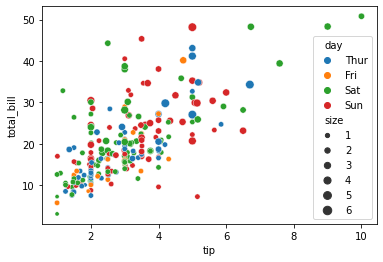

In [59]:
# don't change this cell -- it is needed for the tests to work
tips = sns.load_dataset('tips')
q2_fig = plot_bill_by_tip(tips)

In [60]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest'
""" # END TEST CONFIG
isinstance(q2_fig, matplotlib.figure.Figure)

True

In [61]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'x-axis label incorrect'
""" # END TEST CONFIG
q2_fig.get_axes()[0].get_xlabel()

'tip'

In [62]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'y-axis label incorrect'
""" # END TEST CONFIG
q2_fig.get_axes()[0].get_ylabel()

'total_bill'

**Question 3**

Plot a figure with two subplots side-by-side. The left plot should contain the **counts** of tips *as a percentage of the total bill*. The right plot should contain the **density plot** of tips as a percentage of the total bill. Your plotting function, `plot_tip_percentages` should return a `matplotlib.Figure` object; your plot should look like the plot below (use 10 bins).

<img src="imgs/hist.png" width="50%"/>

In [63]:
def plot_tip_percentages(tips):
    """
    Plots a figure with two subplots side-by-side. 
    The left plot should contain the counts of tips as a percentage of the total bill. 
    The right plot should contain the density plot of tips as a percentage of the total bill. 
    plot_tip_percentages should return a matplotlib.Figure object; 
    your plot should look like the plot in the notebook.

    :Example:
    >>> tips = sns.load_dataset('tips')
    >>> fig = plot_tip_percentages(tips)
    >>> type(fig)
    <class 'matplotlib.figure.Figure'>
    """
    # BEGIN SOLUTION
    tips['%'] = tips['tip'] / tips['total_bill']

    fig, axes = plt.subplots(1, 2)
    tips['%'].plot(kind='hist', ax=axes[0], title='counts')
    tips['%'].plot(kind='hist', density=True, ax=axes[1], title='normalized')

    fig.suptitle('histogram of tips percentages')

    return fig
    # END SOLUTION

Ellipsis

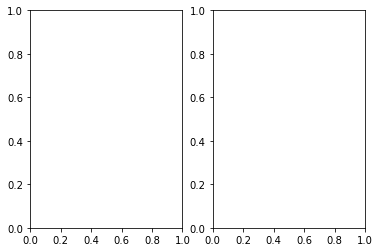

In [64]:
fig, axes = plt.subplots(1, 2)

# plot axes[0]
...
# plot axes[1]
...
# add the title to fig
...

/nix/store/k3120fhhrkn7gn9bvxsjzmcn8sr0sw1w-python3.8-pandas-1.2.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


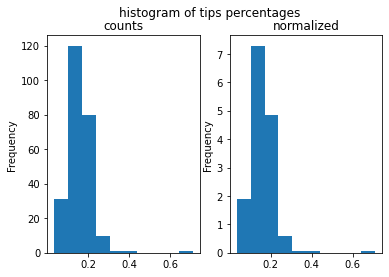

In [65]:
# don't change this cell -- it is needed for the tests to work
tips = sns.load_dataset('tips')
q3_fig = plot_tip_percentages(tips)

In [66]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'doctest'
""" # END TEST CONFIG
isinstance(q3_fig, matplotlib.figure.Figure)

True

In [67]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'need two plots (axes)'
""" # END TEST CONFIG
len(q3_fig.get_axes()) == 2

True

In [68]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'left plot does not have correct title'
""" # END TEST CONFIG
q3_fig.get_axes()[0].get_title()

'counts'

In [69]:
""" # BEGIN TEST CONFIG
points: 1
failure_message: 'right plot does not have correct title'
""" # END TEST CONFIG
q3_fig.get_axes()[1].get_title()

'normalized'

## Congratulations! You're done!

* Submit your `.py` file to Gradescope. Note that you only need to submit the `.py` file; this notebook should not be uploaded. Make sure that all of your work is in the `.py` file and not here by running the doctests: `python -m doctest discussion.py`.